In [15]:
from Func_Col import *
import numpy as np
import matplotlib.pyplot as plt

In [16]:
val = []
for n in np.linspace(0, 1/3 , 1000):
    val.append(realign_log(rhob(n,generate_bell_states())))

print(val)

[6.406853007629834e-16, 0.0006302216760494471, 0.0012602487713945063, 0.0018900817852455251, 0.0025197212182144517, 0.0031491675723248885, 0.003778421351029788, 0.004407483059218882, 0.005036353203236937, 0.005665032290892715, 0.006293520831475874, 0.006921819335768406, 0.007549928316057959, 0.008177848286153663, 0.008805579761396497, 0.009433123258677286, 0.01006047929644762, 0.010687648394734895, 0.011314631075157629, 0.011941427860938506, 0.012568039276919924, 0.013194465849577605, 0.013820708107036376, 0.01444676657908464, 0.01507264179718945, 0.015698334294510896, 0.016323844605919943, 0.016949173268010844, 0.01757432081911823, 0.018199287799332, 0.018824074750516222, 0.01944868221631916, 0.020073110742195272, 0.020697360875418323, 0.021321433165097884, 0.021945328162199008, 0.022569046419552957, 0.023192588491881504, 0.023815954935806648, 0.024439146309871946, 0.0250621631745613, 0.02568500609231043, 0.02630767562753183, 0.026930172346624925, 0.027552496818002786, 0.0281746496121

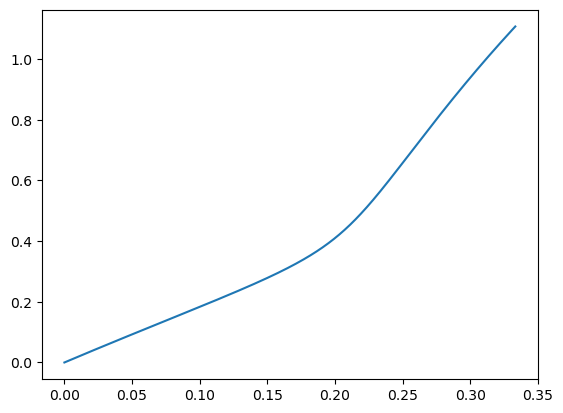

In [17]:
plt.plot(np.linspace(0,1/3,1000), val)

In [58]:
e = [0,0,1]
xi = 0.9
momentum = [2,np.sqrt(3),0,0]

w = (wigner(e,xi,momentum))

for m in range(4):
    for n in range(4):
        if w[m,n] < 1e-12:
            w[m,n] = 0
        else:
            pass

print(w)

w3d = w[1:,1:]
print(2*"\n",w3d)

[[1.         0.         0.         0.        ]
 [0.         0.88798059 0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.45988093 0.         0.88798059]]


 [[0.88798059 0.         0.        ]
 [0.         1.         0.        ]
 [0.45988093 0.         0.88798059]]


In [59]:
V = np.array([
        [-1, 1j, 0] / np.sqrt(2),
        [0, 0, np.sqrt(2) / np.sqrt(2)],
        [1, 1j, 0] / np.sqrt(2)])

d = np.matmul(V,np.matmul(w3d,V.conj().transpose()))

In [60]:
rhonew = np.matmul(np.kron(d.conj(),d.conj()),np.matmul(rho,np.kron(d.conj().transpose(),d.conj().transpose())))

In [61]:
realign_log(rhonew)

-0.22216626982832602

In [62]:
dconj = d.conj()
ddagger = dconj.transpose()


val_08=[]
for n in np.linspace(0, 1/3 , 1000):
    val_08.append(realign_log(np.matmul(np.kron(dconj,dconj),np.matmul(rhob(n,generate_bell_states()),np.kron(ddagger,ddagger)))))

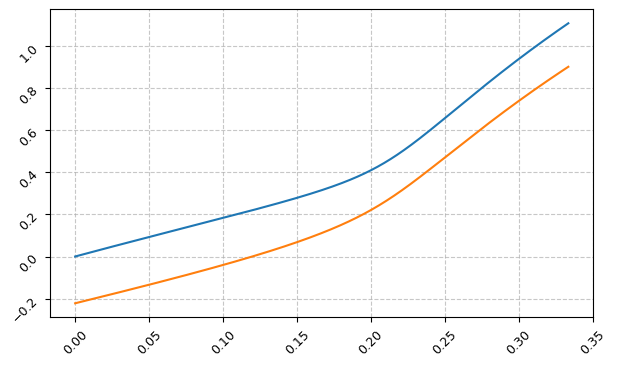

In [63]:
plt.figure(figsize=(7, 4))
plt.plot(np.linspace(0,1/3,1000), val)
plt.plot(np.linspace(0,1/3,1000), val_08)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=9, rotation=45)
plt.yticks(fontsize=9, rotation=45)
plt.show()